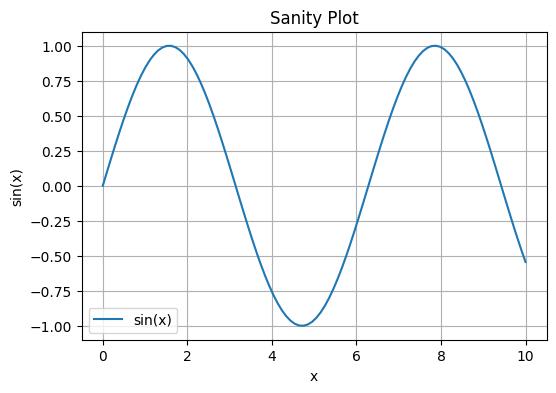

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='sin(x)')
plt.title("Sanity Plot")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
#Load and Inspect the Scenario File/Pickle file

# Provide the full path to a scenario .pkl file
scenario_path = "C:/Users/kumar/OneDrive/Desktop/Research_Project/scenarionet_repo/output/output_0/sd_nuscenes_v1.0-mini_scene-0061.pkl"

# Load the pickle file/scenario_path
with open(scenario_path, "rb") as f:
   scenario = pickle.load(f)

# Confirm successful loading
#print(f"Loaded scenario from: {file_path}")

# Print top-level keys
print("Top-level keys:", scenario.keys())


Top-level keys: dict_keys(['id', 'version', 'length', 'metadata', 'tracks', 'dynamic_map_states', 'map_features'])


In [4]:
# Inspect track_infos
track_infos = scenario['metadata'].get('track_infos', {})
print("Available track IDs:", list(track_infos.keys())[:5])  # just the first 5

# Check content of 'tracks'
print(f"scenario['tracks'] type: {type(scenario['tracks'])}")
print(f"Number of items: {len(scenario['tracks'])}")

# Inspect track_data
track_infos = scenario['metadata'].get('track_infos', {})
print("Available track IDs:", list(track_infos.keys())[:5])  # just the first 5

# Check content of 'tracks'
print(f"scenario['tracks'] type: {type(scenario['tracks'])}")
print(f"Number of items: {len(scenario['tracks'])}")

# Print first 2 full track objects to inspect structure
for i, (track_id, track_data) in enumerate(scenario['tracks'].items()):
    print(f"\nTrack {i} (ID: {track_id}):")
    print(f"  Type: {track_data.get('type')}")
    print(f"  Keys: {list(track_data.keys())}")
    if 'state' in track_data:
        print(f"  State keys: {list(track_data['state'].keys())}")
    if i == 1:
        break  # stop after printing 2 tracks


Available track IDs: []
scenario['tracks'] type: <class 'dict'>
Number of items: 226
Available track IDs: []
scenario['tracks'] type: <class 'dict'>
Number of items: 226

Track 0 (ID: 6f6da3251c4c4398b45e47aeb030682b):
  Type: TRAFFIC_BARRIER
  Keys: ['type', 'state', 'metadata']
  State keys: ['position', 'heading', 'velocity', 'valid', 'length', 'width', 'height']

Track 1 (ID: c38e6667f26a4fb5a6b2f2ce9a61ad5b):
  Type: TRAFFIC_BARRIER
  Keys: ['type', 'state', 'metadata']
  State keys: ['position', 'heading', 'velocity', 'valid', 'length', 'width', 'height']


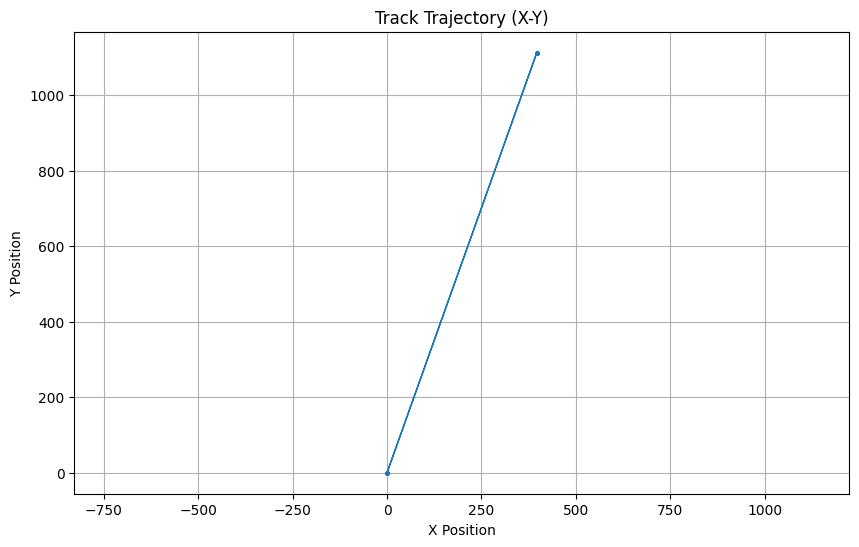

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Extract X and Y from 'position'
positions = np.array(first_track['state']['position'])  # shape: (timesteps, 3)
x = positions[:, 0]
y = positions[:, 1]

# Plot trajectory
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', markersize=2, linestyle='-', linewidth=1)
plt.title("Track Trajectory (X-Y)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.axis('equal')
plt.grid(True)
plt.show()


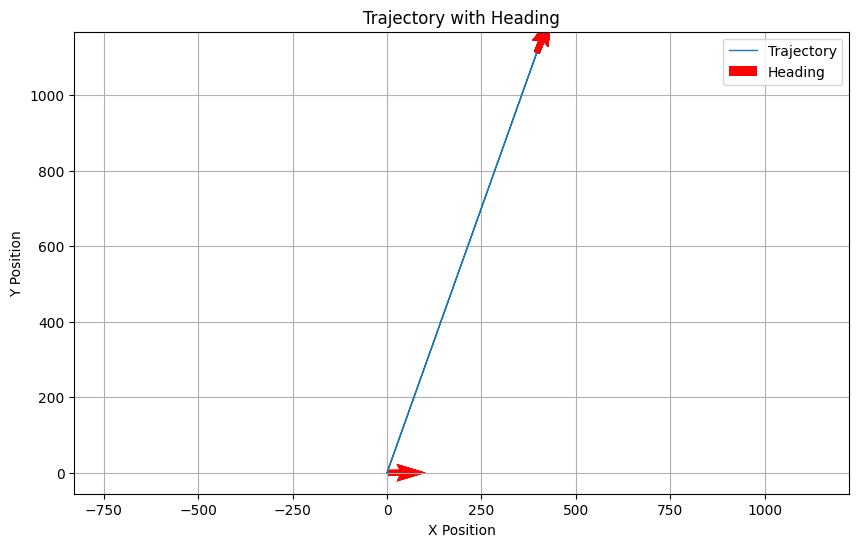

In [7]:
headings = np.array(first_track['state']['heading'])  # shape: (timesteps,)
skip = 5  # draw every 5 steps to avoid clutter

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Trajectory", linewidth=1)
plt.quiver(x[::skip], y[::skip], np.cos(headings[::skip]), np.sin(headings[::skip]),
           scale=20, color='r', label='Heading')

plt.title("Trajectory with Heading")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()
